In [1]:
file_path = 'testfile.txt'
fp = open(file_path, 'r')
line = fp.read().strip() # Delete space in strings
line = line.replace('\n', ',') # Replace escape string \n with ,
line = line.split(',') # Split strings between ,

x = [] # feature
Y = [] # Label

for i in range(0, len(line), 2):
    x.append(float(line[i]))
    Y.append(float(line[i+1]))


In [2]:
def inv(A):
    
    #  A = LU (LDU)
    #  A_inv = U_inv @ D_inv @ L_inv
    l,d,u = LU(A)
    l_inv = lowTriangle_inv(l)
    d_inv = diagonal_inv(d)
    u_inv = upperTriangle_inv(u)
    
    return u_inv@d_inv@l_inv

def LU(A):
    row, col = A.shape
    assert row==col ,'Matrix is not square matrix' # 確認方陣
    L = np.identity(row)
    D = np.identity(row)
    U = np.array(A)


    # Subtraction & Eliminate    
    for i in range(row):    
        for j in range(i+1, row):
            scalar = U[j,i]/U[i,i]
            U[j,i:] = U[j,i:] - scalar*U[i,i:]
            L[j:,i] = L[j:,i] + scalar*L[j:,j]
    
    # D = U's diagonal
    # U = U / D  row by row
    for i in range(row):
        D[i,i] = U[i,i]
        U[i,:] = U[i,:]/D[i,i]
        
    return L,D,U

# L inverse
def lowTriangle_inv(A):
    row, col = A.shape
    assert row==col , 'Matrix is not square matrix' # 確認方陣
    A_inv = np.identity(row)
    
    # 高斯消去
    for i in range(row-1):
        for j in range(i+1, row):
            A_inv[j,:] -= A_inv[i,:]*A[j,i]
    return A_inv

# D inverse
def diagonal_inv(A):
    row, col = A.shape
    assert row==col , 'Matrix is not square matrix' # 確認方陣
    A_inv = np.array(A)
    
    # 對角線取倒數
    for i in range(row):
        A_inv[i,i] = 1/A_inv[i,i]
    return A_inv
    
# U inverse
def upperTriangle_inv(A):
    row, col = A.shape
    assert row==col , 'Matrix is not square matrix' # 確認方陣
    A_inv = np.identity(row)
    
    # 高斯消去
    for i in range(row-1, 0, -1):
        for j in range(i-1, -1, -1):
            A_inv[j,:] -= A_inv[i,:]*A[j,i]
    return A_inv

In [3]:
def LSE(A, Y, LAMBDA):
    
    """
    A: x features x^0, x^1, x^2,...
    Y: True label value
    LAMBDA: Regularization penalty
    """
    
    row, col = A.shape
    return inv(A.T@A + LAMBDA*np.identity(col))@A.T@Y
    
def LSE_loss(A, W, Y):
    
    """
    W: weights x^0 * w0 + x^1 * w1 + x^2 * w2 + ...
    A: x features x^0, x^1, x^2,...
    Y: True label value
    """
    return np.sum((A@W - Y)**2)

In [4]:
def Newton(A, b):
    
    """
    A: x features x^0, x^1, x^2,...
    b: True label value
    """
    # derivative 1: 2*A.T@A@x0-2*A.T@b Gradient
    # derivative 2: inv(2*A.T@A) Hessian Matrix
    
    data, feature = A.shape
    x0 = np.random.randn(feature,1)
    epsilon = np.inf
    while epsilon > 1e-5:
        x1 = x0 - (inv(2*A.T@A)@(2*A.T@A@x0-2*A.T@b))
        epsilon = np.sum((x1-x0)**2)
        x0 = x1
        
    
    return x0

In [5]:
def formula(W):
    
    # W = weights (parameters)
    W = W.reshape(-1)
    n = len(W)-1
    operator = ''
    print('Fitting line: ', end='')
    print(W[0], 'X^'+str(n), end=' ')
    for idx, w in enumerate(W):
        if w < 0 : operator=''
        else : operator='+'
        if idx != 0:
            print(operator, w, 'X^' + str(n-idx),end='') 
    #x^0
    print("")

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, b, W_LSE, W_Newton, n):
    
    """
    x: features x^0, x^1, x^2,...
    b: True label value
    W_LSE: weights by LSE
    W_Newton: weights by Newton's Method
    n: polynomial_basis_size
    """
    
    # LSE
    polynomial_basis_size = n
    plt.subplot(2,1,1)
    plt.title("LSE")
    plt.plot(x, b, 'ro', mec='k')
    x_min = min(x)
    x_max = max(x)
    plt.xlim([x_min-1, x_max+1])
    line_x = np.linspace(x_min-1, x_max+1, 300)
    line_y = np.zeros(len(line_x))
    
    for i in range(len(W_LSE)): # 0~2
        line_y += W_LSE[polynomial_basis_size-i-1]*np.power(line_x,i)
    plt.plot(line_x, line_y, 'k-')
    
    
    # Newton's Method
    plt.subplot(2,1,2)
    plt.title("Newton's Method")
    plt.plot(x, b, 'ro', mec='k')
    x_min = min(x)
    x_max = max(x)
    plt.xlim([x_min-1, x_max+1])
    line_x_newton = np.linspace(x_min-1, x_max+1, 300)
    line_y_newton = np.zeros(len(line_x_newton))

    for i in range(len(W_Newton)): # 0~2
        line_y_newton += W_Newton[polynomial_basis_size-i-1]*np.power(line_x_newton,i)
    plt.plot(line_x_newton, line_y_newton, 'k-')
    plt.tight_layout()
    plt.show()

In [7]:
import numpy as np

def Case(x, Y, n, LAMBDA): 
    
    """
    x: features x^0, x^1, x^2,...
    Y: True label value
    n: polynomial_basis_size
    LAMBDA: Regularization penalty
    """
    print("Case:n=",n,",","Lambda=",LAMBDA)
    
    polynomial_basis_size = n
    Y = np.array(Y).reshape(-1,1)
    A = np.zeros((len(x), polynomial_basis_size))
    for i in range(polynomial_basis_size):
        A[:,polynomial_basis_size-i-1] = np.power(x, i)
    
    # display(A)
    
    W = LSE(A,Y,LAMBDA)
    print("LSE:")
    formula(W)
    print("Total error:",LSE_loss(A,W,Y))
    
    print("")
    
    Newton_W = Newton(A,Y)
    print("Newton's Method:")
    formula(Newton_W)
    print("Total error:",LSE_loss(A,Newton_W,Y))  
    
    plot(x, Y, W, Newton_W, polynomial_basis_size)
    
    

Case:n= 2 , Lambda= 0
LSE:
Fitting line: 4.432950310076806 X^1 + 29.306404706056256 X^0
Total error: 16335.12316495796

Newton's Method:
Fitting line: 4.432950310076806 X^1 + 29.306404706056256 X^0
Total error: 16335.12316495796


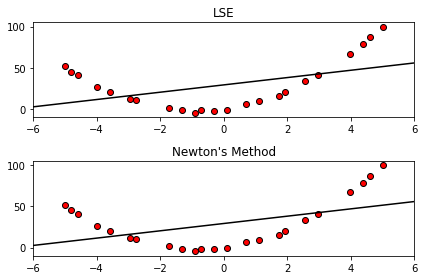

Case:n= 3 , Lambda= 0
LSE:
Fitting line: 3.0238533934865717 X^2 + 4.906190263863799 X^1 -0.2314017560877265 X^0
Total error: 26.559959499333043

Newton's Method:
Fitting line: 3.023853393486569 X^2 + 4.906190263863798 X^1 -0.23140175608769822 X^0
Total error: 26.55995949933309


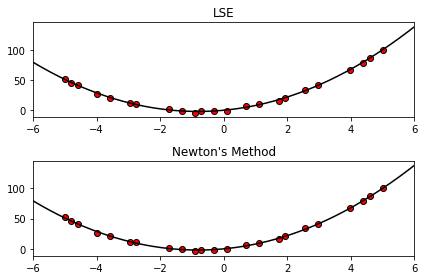

Case:n= 3 , Lambda= 10000
LSE:
Fitting line: 0.834533282700286 X^2 + 0.09314819831918816 X^1+ 0.046950699273469274 X^0
Total error: 22649.73849302414

Newton's Method:
Fitting line: 3.023853393486569 X^2 + 4.906190263863798 X^1 -0.23140175608769825 X^0
Total error: 26.55995949933309


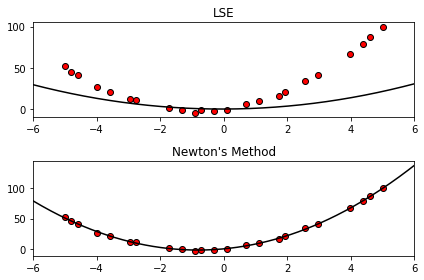

In [8]:
"""
x-> A(x^0, x^1, x^2, ...) Features
Y == b True Labels
W: Formula weights
n: Polynomial_basis_size
"""


Case(x ,Y, 2, 0)
Case(x ,Y, 3, 0)
Case(x ,Y, 3, 10000)